In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer

In [2]:
data = pd.read_csv('apple_quality.csv')

In [3]:
data

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [4]:
data.drop('A_id', axis=1, inplace=True)
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [5]:
data.dropna(inplace=True)

In [6]:
data['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [7]:
features = data.drop('Quality', axis=1)
features

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036
...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806


features.info()

In [8]:
features['Acidity'] = features['Acidity'].astype('float64')

Scaler  


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(features)

WCSS by Elbow Method

In [10]:
wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\

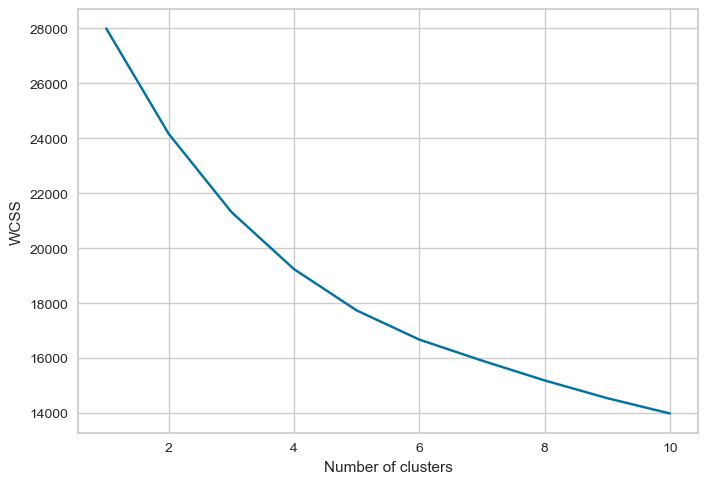

In [11]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Using silhoutte 

In [12]:
min_k = 2
max_k = 10

k_values = range(min_k, max_k+1)

silhouette_scores = []

for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++')
    labels = kmeans.fit_predict(features)
    
    score = silhouette_score(features, labels)
    silhouette_scores.append(score)

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\

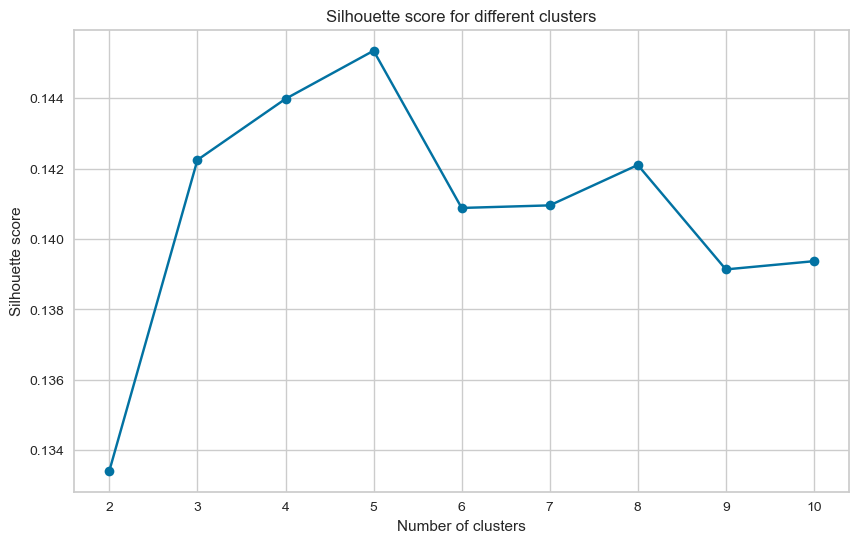

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette score for different clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()

plotting silhoutte

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


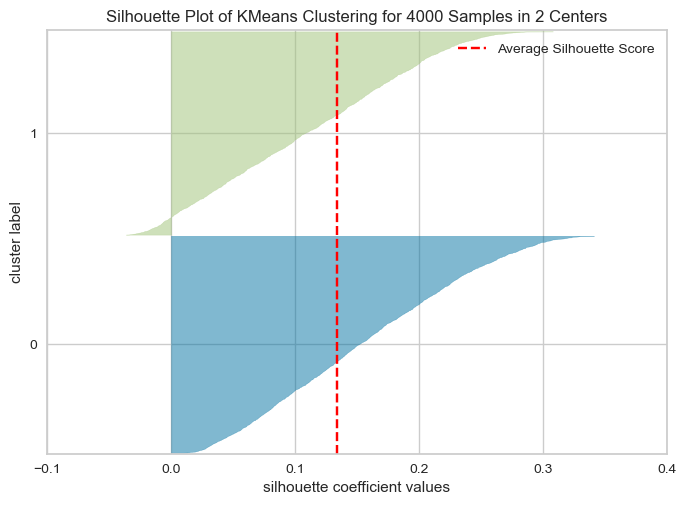

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [15]:
model = KMeans(n_clusters=2, random_state=42)
visualizer =SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(features)
visualizer.show()

In [16]:
features

array([[-1.79842417, -0.95037339,  2.99342063, ...,  0.69054495,
        -0.08987211, -0.26941526],
       [-0.35906018, -1.15440431,  2.12769769, ...,  0.17676683,
         0.1970196 , -0.37899737],
       [ 0.1094454 , -0.22575916, -0.65250727, ...,  1.20542179,
        -0.28615565,  1.20604367],
       ...,
       [-1.1056547 , -0.71690397, -1.01378401, ...,  0.87437918,
         2.27595716, -0.66895013],
       [-1.81811235, -0.49290842,  1.45990059, ...,  0.85454883,
        -0.15141937, -1.09317096],
       [ 0.40540882, -0.45307081,  0.30449592, ...,  0.39095445,
        -0.68021237,  0.72176064]])

In [17]:
kmeans = KMeans(n_clusters=2, init='k-means++')
predictions = kmeans.fit_predict(features)
predictions

C:\Users\Nicolaus\Machine Learning\sample_project_1\env\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 0, 0])

In [18]:
X = features.values
X

AttributeError: 'numpy.ndarray' object has no attribute 'values'

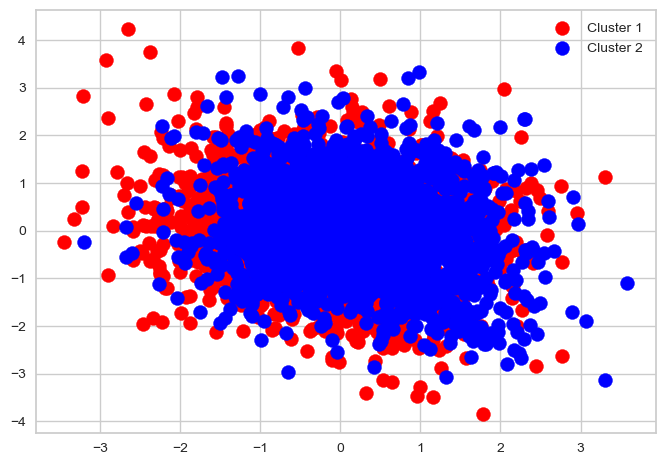

In [20]:
plt.scatter(features[predictions == 0, 0], features[predictions == 0, 1], s=100, color='red', label='Cluster 1')
plt.scatter(features[predictions == 1, 0], features[predictions == 1, 1], s=100, color='blue', label='Cluster 2')
plt.legend()
plt.show()